In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
out = pd.read_csv('kanji_data_cleansed.csv')
out

,word index,english,hiragana,kanji,date_added,rank,sample,is_active,grade,streak,level,total_attempts,total_successes,total_fails,success_ratio,age
0,0,house,いえ,家,09/05/2020,1,1,0,N5,10,expert,19.0,19.0,0.0,1.000000,299
1,1,(someone's) house,おたく,お宅,09/05/2020,1,1,0,N4,10,expert,12.0,12.0,0.0,1.000000,299
2,2,nervous,ふあん,不安,09/05/2020,2,1,0,N3,10,expert,17.0,17.0,0.0,1.000000,299
3,3,class,じゅぎょう,授業,09/05/2020,3,1,1,N5,8,expert,51.0,41.0,10.0,0.803922,299
4,4,to lend,かす,貸す,09/05/2020,2,1,0,N5,10,expert,42.0,35.0,7.0,0.833333,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,623,absence;not at home,るす,留守,03/03/2021,3,4,1,N4,0,beginner,1.0,0.0,1.0,0.000000,1
624,624,far (away),とおい,遠い,03/03/2021,3,4,1,N5,1,beginner,1.0,1.0,0.0,1.000000,1
625,625,safe,あんぜん,安全,03/03/2021,2,5,1,N4,0,beginner,2.0,1.0,1.0,0.500000,1
626,626,precious;valuable,たいせつ,大切,03/03/2021,1,4,1,N5,1,beginner,1.0,1.0,0.0,1.000000,1


In [2]:
out.describe()

,word index,rank,sample,is_active,streak,total_attempts,total_successes,total_fails,success_ratio,age
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,313.500000,2.555732,1.359873,0.544586,8.339172,26.896497,21.794586,5.101911,0.836352,209.957006
std,181.432265,1.222496,1.035778,0.498405,2.028016,11.714593,7.702658,5.211550,0.132200,83.842164
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,156.750000,2.000000,1.000000,0.000000,7.000000,19.000000,17.000000,1.000000,0.753289,165.000000
50%,313.500000,2.000000,1.000000,1.000000,9.000000,25.000000,21.000000,4.000000,0.846154,246.000000
75%,470.250000,3.000000,1.000000,1.000000,10.000000,34.000000,26.000000,7.000000,0.941176,271.000000
max,627.000000,5.000000,5.000000,1.000000,10.000000,84.000000,56.000000,29.000000,1.000000,299.000000


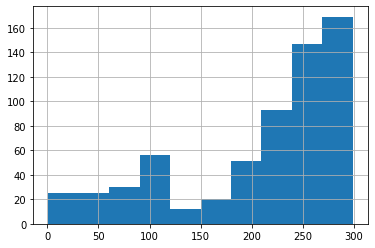

In [3]:
out.age.hist()

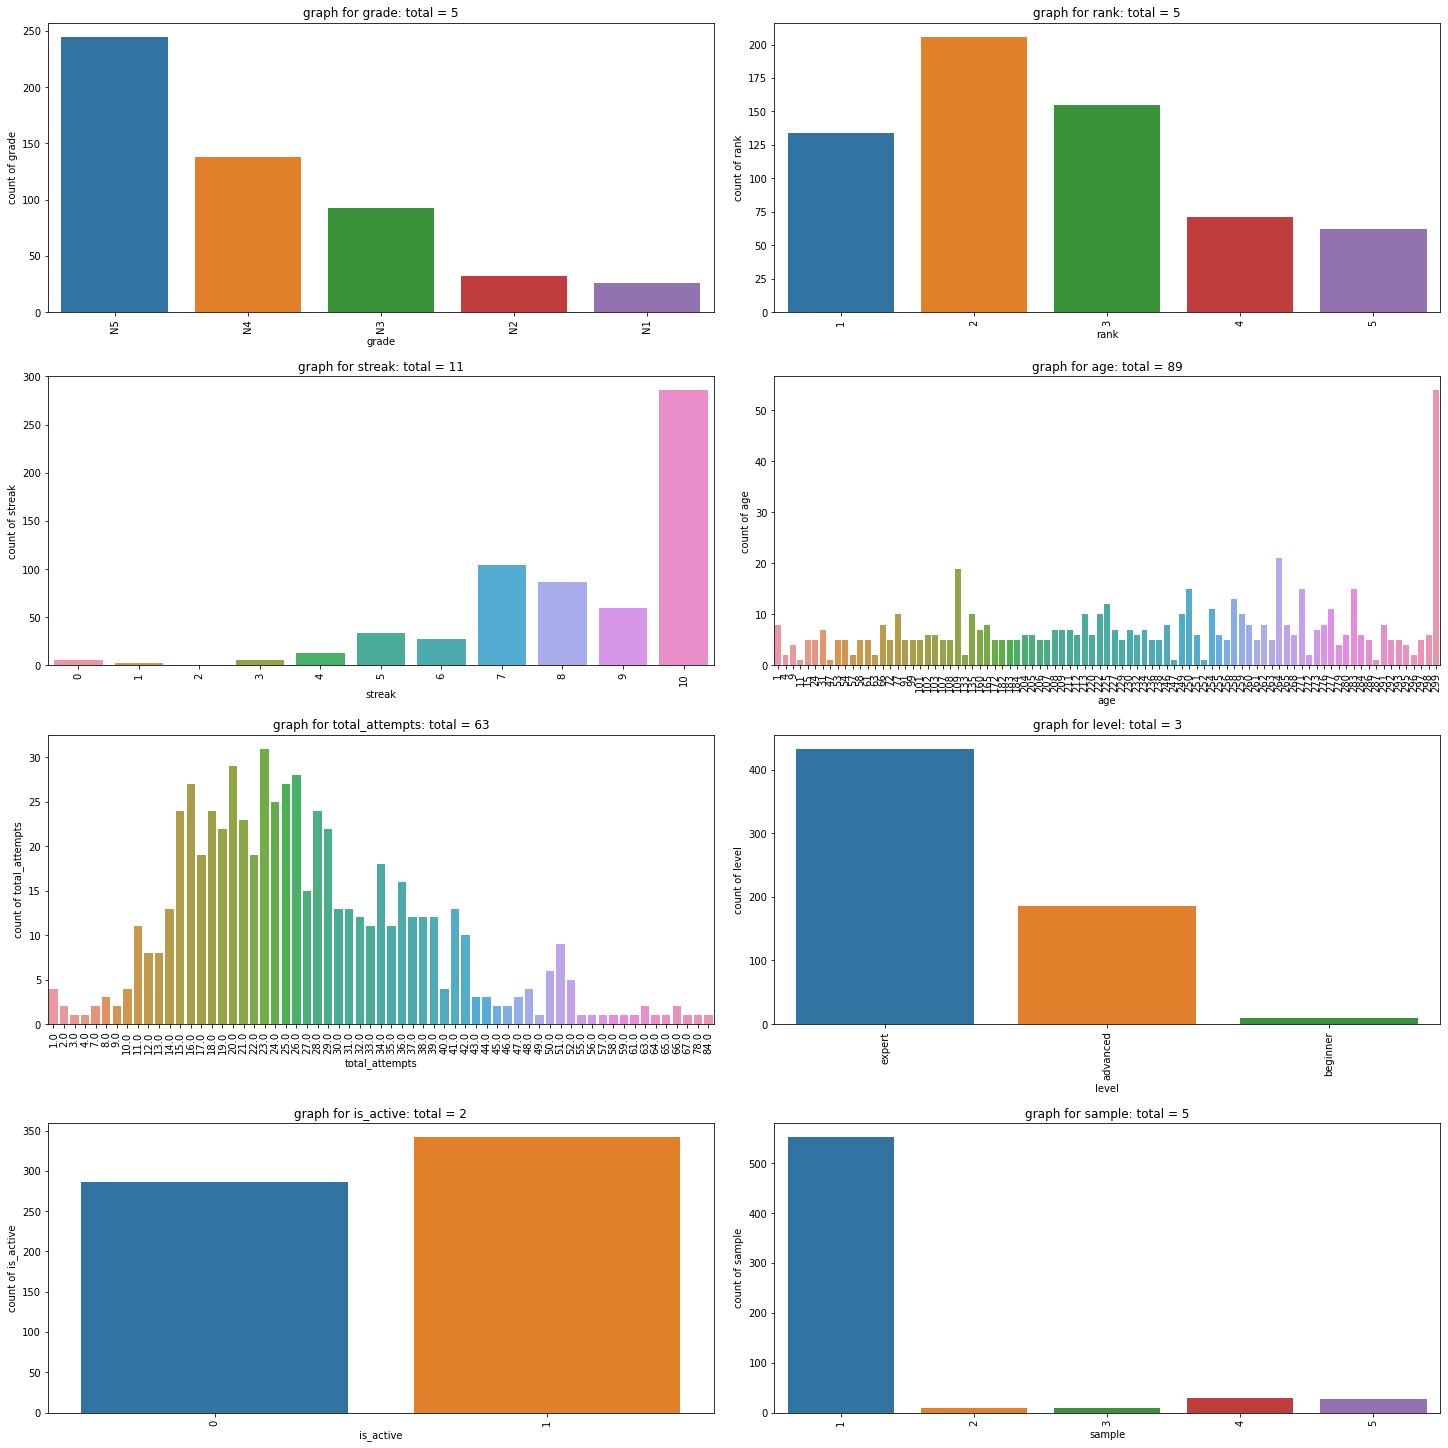

In [4]:
df_cat = out[['grade','rank','streak','age','total_attempts','level','is_active','sample']]
f, axes = plt.subplots(4, 2,figsize=(20,20),constrained_layout=True)
axes_list = [item for sublist in axes for item in sublist] 
j = 0
for i in df_cat.columns:    
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num,ax=axes_list[j])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.set(xlabel=i, ylabel='count of {}'.format(i)) 
    chart.set_title("graph for {}: total = {}".format(i, len(cat_num)))
    j += 1


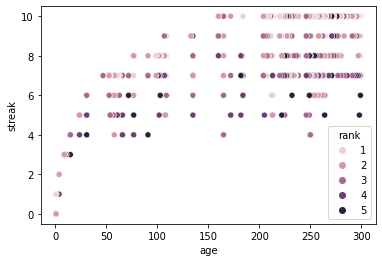

In [5]:
streak_age_plot = sns.scatterplot(data = out, x="age", y="streak", hue="rank")
fig = streak_age_plot.get_figure()
fig.savefig('streak_age_plot.png') 

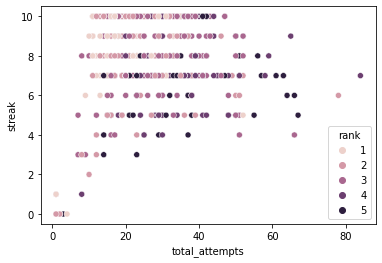

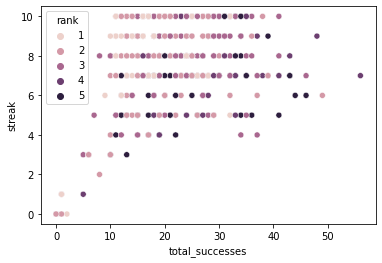

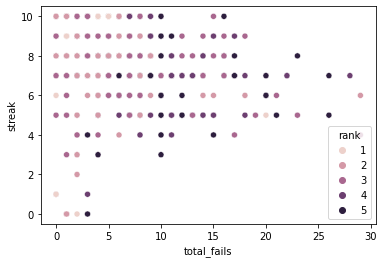

In [6]:
x_ = out[['total_attempts','total_successes', 'total_fails']]
for i in x_.columns:
    plt.figure()
    sns.scatterplot(data = out, x=x_[i], y="streak", hue="rank")

In [7]:
## Manage Fact Streak Degradation QUERY 1

Index(['index_word', 'streak', 'date', 'sample'], dtype='object')


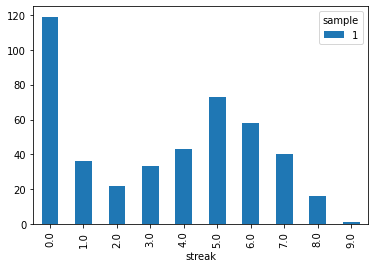

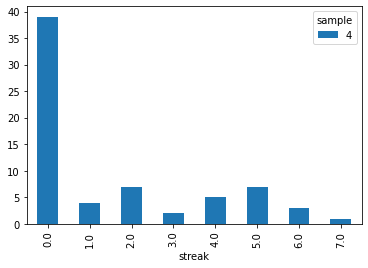

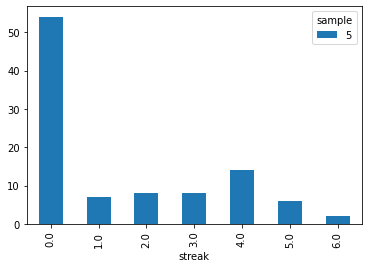

In [8]:
import pandas as pd
fact_streak = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/fact_streak.csv'
df_fs = pd.read_csv(fact_streak)

def new_df(my_index,df_fs):
    df2 = df_fs[df_fs['index_word'] == my_index].copy()
    df2['streak_prev'] = df2['streak'].shift(1)
    return df2
def find_decrease(df2, d):
    for index,row in df2.iterrows():
        if row['streak'] <= row['streak_prev']:
#             print(row['streak_prev'])
            newrow = row['index_word']
            d.append([newrow,row['streak_prev'],row['sample']])
    return d
def block(df_fs,k=0):
    if k != 0:
        df_fs = df_fs.loc[df_fs['sample']==k]
    d = []
    indexes = df_fs.index_word.unique()
    for i in indexes:
    #     if len(df_fs[df_fs['index_word'] == i]) > 8:
        df2 = new_df(i,df_fs)
        d = find_decrease(df2, d)

    df_new = pd.DataFrame (d,columns=['index_word','streak', 'sample'])
    df_new
    grouped = df_new.groupby(['streak','sample'])['streak'].size().unstack('sample').fillna(0)

    grouped.plot(kind = 'bar', stacked=True)
    plt.savefig('streak_decrease_sample'+ str(k) + '.png', bbox_inches='tight')
    # title needed     
    
    
ks = [1, 4,5]
for k in ks:
    if k == 1: 
        filt_words = out.loc[pd.to_datetime(out['date_added'], dayfirst=True)>pd.to_datetime('01/09/2020', dayfirst=True)]
        lst = filt_words['word index']
        print(df_fs.columns)
        df_fs = df_fs.loc[df_fs['index_word'].isin(lst)]
    block(df_fs,k)
    


In [9]:
# QUERY 2

import pandas as pd
fact_streak = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/fact_streak.csv'
from datetime import datetime as dt


def to_n(df,n):
    df2 = df.loc[df['streak']==n]
    # pivot table on success/fail by JLPT grade
    words = df2.index_word.unique()
    data = []
    for word in words:
        df3 = df2.loc[df2['index_word']==word]
        data.append([word, df3.date.min()])
    date_to_n = 'date_to_{}'.format(n)
    df4 = pd.DataFrame(data, columns = ['word index', date_to_n])  
    return df4, words

def create_date(df, words, df4):
    df2 = df.loc[df['word index'].isin(words)]
    df3 = pd.merge(df4, df2[['word index', 'english','date_added']], on='word index', how='outer')
    df3['date_diff'] = (pd.to_datetime(df3.iloc[:,1], dayfirst=True) - pd.to_datetime(df3.date_added, dayfirst=True)).dt.days
    # check average after certain date:     
    df3 = df3.loc[pd.to_datetime(df3['date_added'], dayfirst=True)>pd.to_datetime('01/10/2020', dayfirst=True)]
    print('Number of words in sample: {}'.format(len(list(df3['word index']))))
    return df3
    
    
def avg_(k,n):
    df = pd.read_csv('kanji_data_cleansed.csv')
    df_fs = pd.read_csv(fact_streak)
    df_fs = df_fs.loc[df_fs['sample']==k]
    df4, words = to_n(df_fs,n)
    df3 = create_date(df,words,df4)
    avg_to = df3['date_diff'].mean().round(2)
    min_to = df3['date_diff'].min()
    max_to = df3['date_diff'].max()
#     fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#     boxs = sns.boxplot(df3['date_diff'],ax=axes[0])
#     plt.figure()
#     hists = sns.histplot(data=df3, x="date_diff", ax=axes[1])
#     plt.figure()
    print('Average of {} days to reach streak {} for sample {}'.format(avg_to,n,k))
    print('Observed minimum of {} days to reach streak {} for sample {}'.format(min_to,n,k))
    print('Observed maximum of {} days to reach streak {} for sample {}'.format(max_to,n,k))
#     print(df3['date_diff'].describe())
#     print(df3[['english','date_added', 'date_diff']].head(5))
    rolling_avg_streak(df3,k)
    date_diffs = df3['date_diff']
    return date_diffs


# rolling monthly average of average to streak = n:
def rolling_avg_streak(df,k):
    df['year_month'] = pd.to_datetime(df['date_added'], dayfirst=True).dt.strftime('%Y-%m')
    months = list(df['year_month'].unique())
    tally = []
    count_ = []
    for i in months:
        per = df.loc[pd.to_datetime(df['date_added'], dayfirst=True).dt.strftime('%Y-%m') == i]
        mean_ = per['date_diff'].mean().round(2)
        print(i, mean_, len(per))
        tally.append(mean_)
        count_.append(len(per))
    plt.plot(months, tally, label= 'reaching target streak value')
    plt.xlabel('month')
    plt.ylabel('monthly avg days to target streak')
    plt.show()
#     plt.savefig('rolling_avg_sample'+ str(k) + '.png')
    print('-------------')
    


-------------
-------------
N=5
-------------
-------------
words in sample num 1: 553
average success for sample num 1: 0.84

Absolute minimum of 15 days to reach streak 5 for sample 1
Number of words in sample: 91
Average of 28.58 days to reach streak 5 for sample 1
Observed minimum of 14 days to reach streak 5 for sample 1
Observed maximum of 134 days to reach streak 5 for sample 1
2020-10 37.0 12
2020-11 26.27 51
2020-12 29.18 28


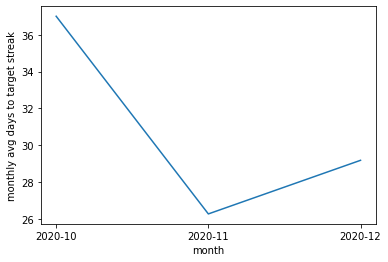

-------------

words in sample num 4: 29
average success for sample num 4: 0.77

Absolute minimum of 12 days to reach streak 5 for sample 4
Number of words in sample: 24
Average of 23.67 days to reach streak 5 for sample 4
Observed minimum of 14 days to reach streak 5 for sample 4
Observed maximum of 45 days to reach streak 5 for sample 4
2020-12 31.5 2
2021-01 28.0 11
2021-02 17.91 11


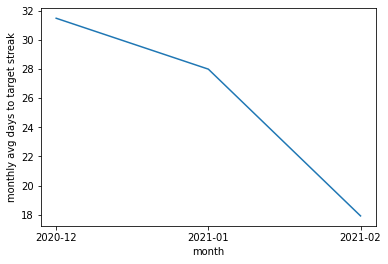

-------------

words in sample num 5: 28
average success for sample num 5: 0.72

Absolute minimum of 9 days to reach streak 5 for sample 5
Number of words in sample: 20
Average of 28.65 days to reach streak 5 for sample 5
Observed minimum of 15 days to reach streak 5 for sample 5
Observed maximum of 67 days to reach streak 5 for sample 5
2021-01 33.0 12
2021-02 22.12 8


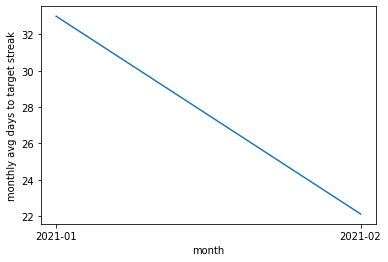

-------------



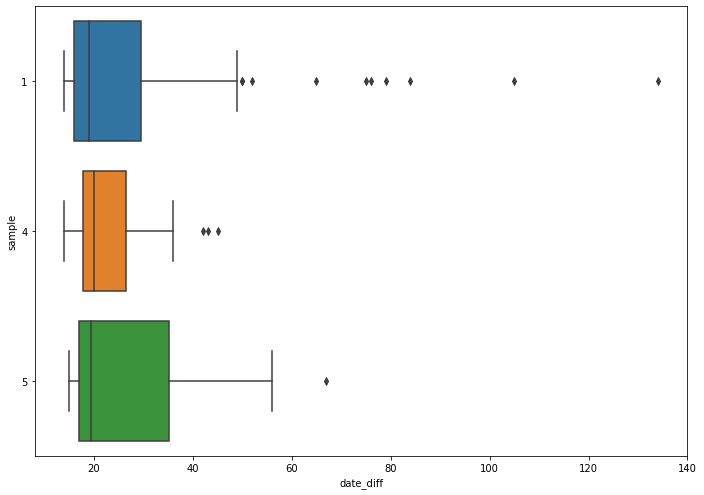

<Figure size 432x288 with 0 Axes>

In [10]:
# general details of statistics per sample
# to do: target sample streak ratio: fact_streak: date of first streak=5 per word in sample. compare with create date, then diff
# min days at each streak vs actual vs diff
# get max diff
def body(n):
    intervals_general = [0, 1, 2, 4, 7, 12, 12, 31, 31, 31, 31]
    # intervals3 = [0, 1, 3, 7, 14, 31, 31, 31, 31, 31, 31]
    intervals4 = [0, 1, 2, 3, 5, 10, 10, 31, 31, 31, 31]
    intervals5 = [0, 1, 1, 2, 4, 6, 10, 10, 31, 31, 31, 31]
    intervals = [intervals_general, intervals4, intervals5]
    intervals_desc = ['intervals_general', 'intervals4', 'intervals5']
#     n = 5
    def sum_n(lst,n):
        return sum(lst[:n])

    samples = [1,4,5]
    ldf = []
    ls = []
    dfs = pd.DataFrame()
    for i,j in zip(samples, intervals):
        sampler = out.loc[out['sample']==i]
        print('words in sample num {}:'.format(i),len(sampler))
        means = sampler['success_ratio'].mean()
        print('average success for sample num {}:'.format(i), means.round(decimals=2))
        print()
        days_to_ = 1 + sum_n(j, n)
        print('Absolute minimum of {} days to reach streak {} for sample {}'.format(days_to_, n, i))
        date_diffs = avg_(i,n)
        ldf.extend(list(date_diffs))
        ls.extend(list([1*i]*len(list(date_diffs))))
        print()
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    dfs['date_diff'] = ldf
    dfs['sample'] = ls
    boxplot = sns.boxplot(ax=ax,x='date_diff', y='sample',orient="h",data=dfs)
    plt.figure()
    fig = boxplot.get_figure()
    fig.savefig('boxplot.png')
    
    
    
    
for n in [5]:
    print('-------------')
    print('-------------')
    print('N={}'.format(n))
    print('-------------')
    print('-------------')
    body(n)
    
    

['2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03']
2020-05 :  1010 ,  880 ,  0.87 %
2020-06 :  2998 ,  2529 ,  0.84 %
2020-07 :  2628 ,  2156 ,  0.82 %
2020-08 :  2021 ,  1646 ,  0.81 %
2020-09 :  1519 ,  1234 ,  0.81 %
2020-10 :  1185 ,  925 ,  0.78 %
2020-11 :  1368 ,  1074 ,  0.79 %
2020-12 :  1468 ,  1153 ,  0.79 %
2021-01 :  1411 ,  1091 ,  0.77 %
2021-02 :  1150 ,  891 ,  0.77 %
2021-03 :  681 ,  527 ,  0.77 %


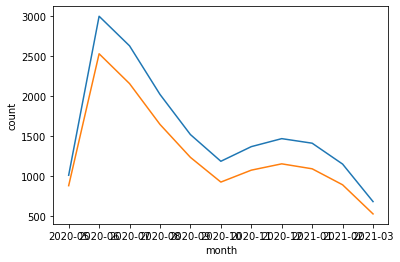

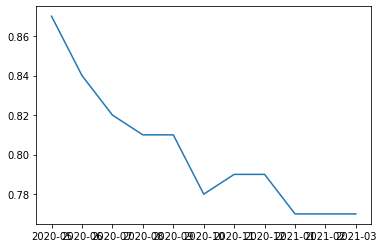

In [11]:
# rolling monthly average of success ratio
path = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/results2.csv'
df = pd.read_csv(path)
df['year_month'] = pd.to_datetime(df['date'], dayfirst=True).dt.strftime('%Y-%m')
years = list(df['year_month'].unique())
print(years)
count_res = []
success = []
success_ratio = []
for i in years:
    per = df.loc[pd.to_datetime(df['date'], dayfirst=True).dt.strftime('%Y-%m') == i]
    counts = len(per)
    suc = sum(per.result)
    ratio = round(suc/counts,2)
    count_res.append(counts)
    success.append(suc)
    success_ratio.append(ratio)
    print(i, ': ', counts, ', ', suc,', ', ratio,'%')

plt.plot(years, count_res, label= 'total attempts')
plt.plot(years, success, label= 'success ratio')
plt.xlabel('month')
plt.ylabel('count')
plt.show()
plt.plot(years, success_ratio)


In [12]:
dfs = pd.DataFrame({'date_diff':[], 'sample':[]})

In [13]:
import pandas as pd
path = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/streak.csv'
testy = pd.read_csv(path)
testy[testy['sample'] == 5].count()

index_word    33
streak        33
date          33
sample        33
dtype: int64

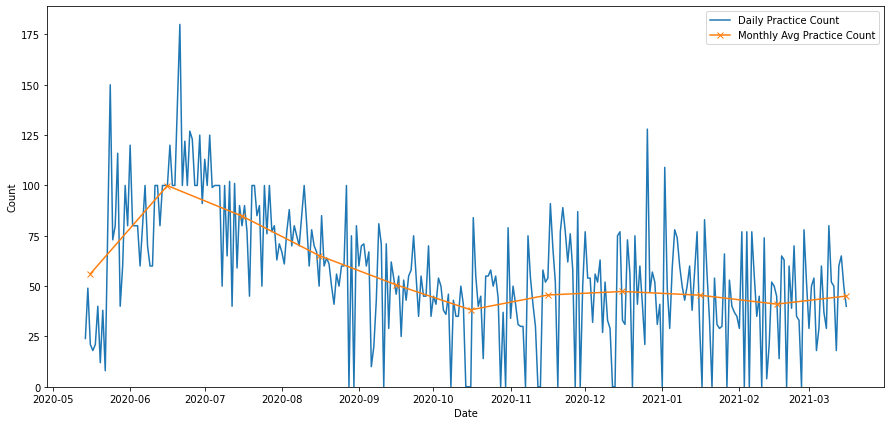

In [50]:
path = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/results2.csv'
res_ = pd.read_csv(path)
def daily(res_):
    # Convert date column to datetime for correct sorting in pivot table
    res_['date'] = pd.to_datetime(res_['date'], dayfirst=True)
    start_date = res_['date'].min().date()
    end_date = res_['date'].max().date()
    daily_plot = res_[['index_word', 'date']].groupby(['date']).agg(['count']).sort_values(by='date')

    daily_plot.columns = daily_plot.columns.droplevel(0) #remove amount
    daily_plot.columns.name = None                #remove categories
    daily_plot = daily_plot.reset_index()                #index to columns
    idx = pd.date_range(start=start_date, end=end_date)
    daily_plot.index = pd.DatetimeIndex(daily_plot['date'])
    daily_plot = daily_plot.reindex(idx)
    daily_plot['date'] = daily_plot.index
    daily_plot['count'] = daily_plot['count'].fillna(0)
    return daily_plot

daily_plot = daily(res_)

def monthly(daily_plot):
    daily_plot['year_month'] = pd.to_datetime(daily_plot['date'], dayfirst=True).dt.strftime('%Y-%m')
    months = list(daily_plot['year_month'].unique())
    month_avg = []
    for i in months:
        per = daily_plot.loc[pd.to_datetime(daily_plot['date'], dayfirst=True).dt.strftime('%Y-%m') == i]
        counts = sum(per['count'])
        days = len(per)
        month_avg.append(counts/days)   
    d = {'date':months, 'count':month_avg}
    monthly_plot = pd.DataFrame(d)
    monthly_plot['date'] = pd.to_datetime(monthly_plot['date'], dayfirst=True) + pd.DateOffset(days=15)
    return monthly_plot

monthly_plot = monthly(daily_plot)
monthly_plot.dtypes

fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(daily_plot['date'],daily_plot['count'])
plt.plot(monthly_plot['date'],monthly_plot['count'], marker='x')
plt.legend(['Daily Practice Count', 'Monthly Avg Practice Count'])
plt.axis(ymin=0)
fig.savefig('daily_practice.png')